<a href="https://colab.research.google.com/github/rayaneghilene/Statistics_Python_Labs/blob/main/Tp3_Stat_GHILENE_CHERMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\text{Tp3 : Estimation de densité}$
Dans ce TP, nous utiliserons le langage Python. Il y’a plusieurs manière de l’utiliser, premièrement,
il faut une partie d’écriture de programmes (au format .py) qui peut seulement être faite avec n’importe
quel éditeur de texte, il y’a ensuite un logiciel de compilation des programmes Python, vous pouvez
utiliser celui de votre choix. Chaque graphique demandé dans ce TP sera à enregistrer au format PiNOM1NOM2Qj.png où i est le numéro de la partie en question, j est le numéro de la question au sein
de la partie considérée et NOM1 et NOM2 sont les deux noms de famille des deux membres du binôme
de TP. Chaque question comportant le symbole ? nécessitera la création d’un graphique à enregistrer
comme spécifié ci-dessus. S’il y’a plusieurs graphiques à faire pour une seule question, ils seront nommés
PiNOM1NOM2Qja.png, PiNOM1NOM2Qjb.png etc...

##$Préparation$ 
$Question \hspace{1mm}1$

$ \\ \small{ \text{On pose }K\text{ un noyeau statistique et }\tau _{\mu}K\text{ sa translation de facteur }a
\\ \text{On a }\tau _{\mu}K(x - a) = \tau _{\mu}K(x)
\\\forall x\epsilon \mathbb{R} \hspace{1mm}on \hspace{1mm} a \tau _{\mu}K\geq 0 \\ 
\int_{\mathbb{R}} \tau _{\mu}K(x) dx = \int_{\mathbb{R}} \tau _{\mu}K(x - a) dx = \int_{\mathbb{R}} K(x) dx = 1 \\
\text{Donc on trouve } \tau _{\mu}K(x) = \tau _{\mu}K(\text{-}x)\\
\text{D'ou } \tau _{\mu}K \text{ est un noyeau statistique}}$


$Question\hspace{1mm} 2$ 

$\small{\text{On pose que } d_{\lambda }K \text{ est definie par } d_{\lambda }K = \frac{1}{\lambda} K\geq \frac{x}{\pi}
\\\text{On a } \forall x\epsilon \mathbb{R} \hspace{5mm} d_{\lambda }K(x)\geq 0 \\ \int_{\mathbb{R}} \frac{1}{\lambda} K(\frac{x}{\lambda}) dx = \int_{\mathbb{R}} \frac{1}{\lambda} K(z) \lambda dz = \int_{\mathbb{R}} K(z) dz = 1 \\\text{D'ou on obtient } d_{\lambda }K(x) = d_{\lambda }K(-x) \text{ et }d_{\lambda }K\text{ est un noyeau statistique }}$

$Question\hspace{1mm} 3$

$\\\small{\text{On pose }K(x) = \frac{1}{2}1_{\left [\text{-}1 ;1 \right]}(x)
\\\text{On a } \forall x\epsilon \mathbb{R} \hspace{5mm} K(x)\geq 0
\\ \int_{\mathbb{R}} K(x) dx = \int_{-1}^{1}\frac{1}{2}dx = 1\\
K(x) = k(\text{-}x) \\\text{Ainsi }K\text{ est un noyeau statistique de noyeau uniforme}}$

$Question\hspace{1mm} 4$ 

$\\\small{\text{On pose }K(x) = (1-\left | x \right |)1_{\left [ -1;1 \right ]}(x)\\\text{On a }\forall x\epsilon \mathbb{R} \hspace{5mm} K(x)\geq 0 \\ \int_{\mathbb{R}} K(x) dx = \int_{-1}^{0} 1+x\text{ }dx = \int_{0}^{1} 1-x\text{ }dx = 1 \\\text{Donc } K(x) = k(\text{-}x) \\\text{D'ou }K\text{ est un noyeau statistique de noyeau triangle }}$


$Question\hspace{1mm} 5$

$\\ \small{\text{On pose que } K(x) = \frac{3}{4}(x-\frac{1}{3}x^{3})1_{\left [ -1;1 \right ]}(x)
\\\text{On a } \forall x\epsilon \mathbb{R} \hspace{5mm} K(x)\geq 0 \\ \int_{\mathbb{R}}  K(x) dx = \left [ \frac{3}{4}(x-\frac{1}{3}x^{3}) \right ]_{-1}^{1}= 1 \\\text{Donc } K(x) = k(\text{-}x)
\\\text{D'ou }K\text{ est un noyeau statistique de noyeau  d'Epanechnikov }}$

$Question\hspace{1mm} 6$

$\\\small{\text{On pose }K(x) = \frac{1}{\sqrt{2\pi}}e^{\text{-}\frac{x^{2}}{2}} \\\text{On a } \forall x\epsilon \mathbb{R} \hspace{5mm} K(x)\geq 0 \\ \int_{\mathbb{R}}  K(x) dx = \frac{1}{\sqrt{2\pi}}\int_{\mathbb{R}}e^{\text{-}\frac{x^{2}}{2}} dx = \frac{1}{\sqrt{2\pi}} * {\sqrt{2\pi}} = 1 \\\text{Donc } K(x) = k(\text{-}x)
\\\text{D'ou }K\text{ est un noyeau statistique de noyeau Gaussien}}$


$Question\hspace{1mm} 7$

$ \\\text{On pose } \widehat{f_{h}}(x) =\frac{1}{n}\sum_{i=1}^{n}d_{\lambda}\tau _{X_{i}} K(x)
\\\text{On a } \forall x\epsilon \mathbb{R} \hspace{5mm} \widehat{f_{h}}(x)\geq 0 \\ \int_{\mathbb{R}} \widehat{f_{h}}(x)dx = \frac{1}{n}\sum_{i=1}^{n}d_{\lambda}\tau _{X_{i}} K(x)dx = \frac{1}{n}*n=1 \\\text{D'ou }\widehat{f_{h}}(x)  \text{est une densite de probabilite}$ 


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [72]:
def reference(x): #la densité à estimer
        return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)

#$Partie\hspace{1mm} 1 $

Le but de cette partie est de définir, représenter et comparer l’efficacité des quatre noyaux de la
préparation pour l’estimation de la densité d’une gaussienne standard f. On suppose donc que X1, . . . , Xn
est un échantillon de taille n de variables indépendantes et identiquement distribuées selon la loi normale
centré réduite de densité f. Télécharger le script TP3.py disponible sur Moodle, c’est dans ce script que
vous définirez toutes les fonctions et répondrez aux questions.

---





###$\text{Question 1}$
Définir quatre fonctions K1, K2, K3, K4 correspondant respectivement aux
noyaux uniforme, triangle, d’Epanechnikov et gaussien.**bold text**

In [73]:
def K1(x):
    return (1/2) * (abs(x) <= 1)

def K2(x):
    return (1 - abs(x)) * (abs(x) <= 1)

def K3(x):
    return (3/4) * (1 - x**2) * (abs(x) <= 1)

def K4(x):
    return (1/np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

###$\text{Question 2}$
Représentez ces quatre noyaux sur un même graphique (utiliser une légende et des couleurs
différentes). Créer une fonction pour faire cette question que vous nommerez AllplotK qui prendra
en entrée les paramètres du graphique (le pas, xmin, xmax, les couleurs etc...) et représentera le
graphique en retour.

In [74]:
def AllplotK(pas,xmin,xmax,col1,col2,col3,col4, tit):
    x = np.arange(xmin, xmax, pas)
    plt.plot(x, K1(x), col1, label='Uniforme')
    plt.plot(x, K2(x), col2, label='Triangle')
    plt.plot(x, K3(x), col3, label='Epanechnikov')
    plt.plot(x, K4(x), col4, label='Gaussien')
    plt.legend(['Uniforme', 'Triangle','Epanechnikov',  'Gaussien'])
    plt.title(tit)
    plt.show()

#####$ \text{Représentation des quatre noyeaux} :$

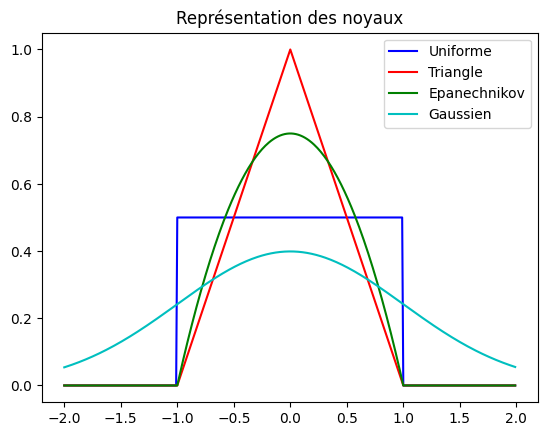

In [75]:
AllplotK(0.01, -2, 2, 'b', 'r', 'g', 'c','Représentation des noyaux')

###$\text{Question 3}$
Générer une réalisation de l’échantillon aléatoire X selon la loi gaussienne standard de taille n. (n
est pour l’instant fixé à 100 dans le script).

In [76]:
n = 100
mu = 0
sigma = 1
X = np.random.normal(mu, sigma, n)
print(X)

[ 0.49959069  2.61392067  0.35459284  0.99625237  0.36134766  1.63103565
  0.97423871  0.38743094  0.15545941  1.20802207  2.19378236 -0.53791564
  2.06976798 -1.22974368 -0.57325996  1.32168381  0.90336952 -0.05280052
 -0.89523846  2.74812105  0.20413348 -1.49781453  1.85121973  0.02272088
 -1.49800669  0.52016823  0.27619313  0.26666535 -1.93843708  1.57101255
 -2.88324838 -0.21486815  0.48103315 -0.23453813  1.41523987  0.67721797
 -0.70811554  0.12050228 -1.35568243  0.46957237  0.44287927 -1.81000498
  0.44333041  0.2063804  -0.66671694 -0.94398761  0.40951792  1.98800113
  1.35204123  0.79662368 -1.42065551  1.03434681 -0.56006672  0.47649931
  0.69902157  0.72151718 -1.15896132 -0.33327518 -0.9415313   0.03717513
 -0.25937641 -1.00197402  0.25338381  0.04274734  0.11086439  0.12867167
 -0.24149807  0.57093757  2.40461152  1.35784325 -0.24213349 -0.05417109
 -0.82855716 -1.80144743  0.48485729 -1.25808846 -0.48494715  0.05954408
 -0.66430792  2.14353119  0.0717104   0.87458078 -1

###$\text{Question 4}$
Définir la fonction fchapeau qui prend comme argument une fonction K (le noyau), la fenêtre h
et la réalisation de l’échantillon X et une variable x et qui retourne l’image de x par la fonction
fbh.

In [77]:
def fchapeau(funct,h,X,x): #l'estimation de la densite f (ici la gaussienne standard, pour une fenetre h, au point x pour le noyau funct)
    return np.mean(funct((x - X) / h) / h)



###$\text{Question 5}$
Représenter sur un même graphique la fonction f de référence ainsi que les quatres fonctions fbh
obtenues avec les noyaux K1, K2, K3, K4. Vous ajouterez une légende et des couleurs différentes à
toutes les courbes. On fixera pour cette question h = 2. Vous définierez une fonction comme dans
la question 2 pour faire cette question. Cette fonction sera nommée Allplotfchapeauh2.



In [78]:
def Allplotfchapeauh2(xmin,xmax,pas,h,n,col1,col2,col3,col4,colref, titre):
  i=1 
  mu=0 
  sigma=1
  X = np.random.normal(mu, sigma, n)
  K =[K1,K2,K3,K3]
  col=[col1,col2,col3,col4]
  x = np.arange(xmin, xmax, pas)
  plt.plot(x, reference(x), colref, label='Reference')
  while i<=4:
    plt.plot(x, [fchapeau(lambda u: K[i-1](u), h, X, xi) for xi in x], col[i-1])
    i+=1
  plt.legend(['Reference', 'Uniforme', 'Triangle','Epanechnikov',  'Gaussien'])
  plt.title(titre)
  plt.show()

#####$ \text{Représentation des chapeaux des noyeaux pour }h=2 :$

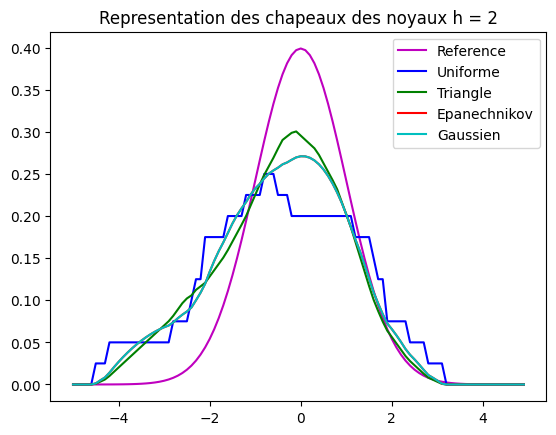

In [79]:
Allplotfchapeauh2(-5, 5, 0.1,2,10,'b', 'g', 'r', 'c', 'm',"Representation des chapeaux des noyaux h = 2")

###$\text{Question 6}$
Refaire la question précédente avec h = 1. Qualitativement, est-ce que l’estimation diffère plus
lorsque l’on fait varier le noyau utilisé ou la fenêtre h utilisée ? La nouvelle fonction pour cette
question sera nommée Allplotfchapeauh1.

#####$ \text{Représentation des chapeaux des noyeaux pour }h=1 :$

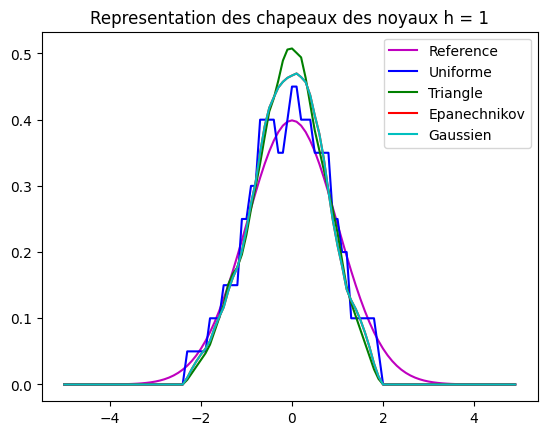

In [80]:
Allplotfchapeauh2(-5, 5, 0.1, 1,10,'b', 'g', 'r', 'c', 'm',"Representation des chapeaux des noyaux h = 1")

#####$\text{Commentaire}$
$\small \text{On voit bien que en dimunuant h la précision augmente.}$

###$\text{Question 7}$
Reprendre les deux questions précédentes pour n = 10 puis n = 1000. Pour cette question, quatre
graphiques doivent être construits : le premier pour (n, h) = (10, 2), le second pour (n, h) = (10, 1),
le suivant pour (n, h) = (1000, 2) et le dernier pour (n, h) = (1000, 1). Vous détaillerez votre
raisonnement dans le script et commenterez les résultats obtenus. Revenir ensuite à la valeur de
n = 100 dans le script pour la suite du TP.


#####$\text{Représentation des chapeaux des noyaux h = 1 et n = 10}$




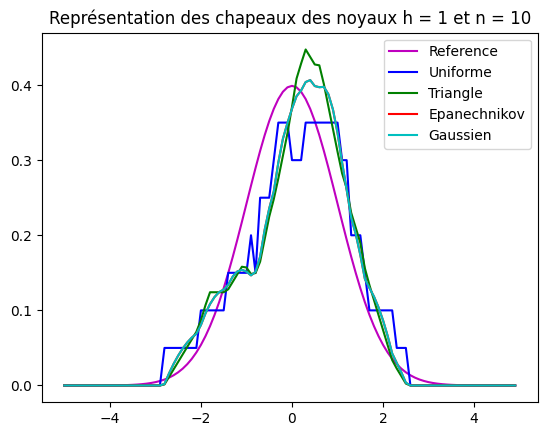

In [81]:
Allplotfchapeauh2(-5, 5, 0.1,1, 10, 'b', 'g', 'r', 'c', 'm',"Représentation des chapeaux des noyaux h = 1 et n = 10") #On trace pour n=10 et h=1

#####$\text{Représentation des chapeaux des noyaux h = 2 et n = 10}$

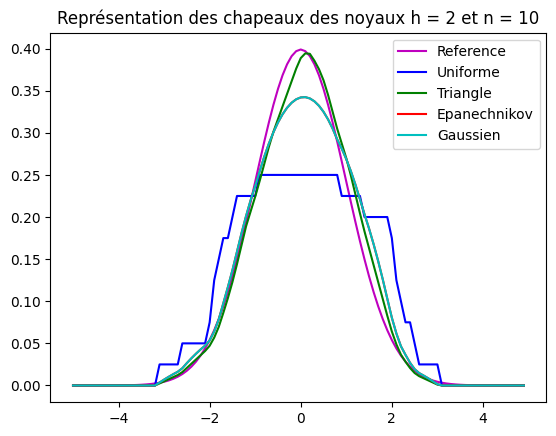

In [82]:
Allplotfchapeauh2(-5, 5, 0.1,2,10, 'b', 'g', 'r', 'c', 'm',"Représentation des chapeaux des noyaux h = 2 et n = 10") #On trace pour n=10 et h=2


#####$\text{Représentation des chapeaux des noyaux h = 1 et n = 1000}$

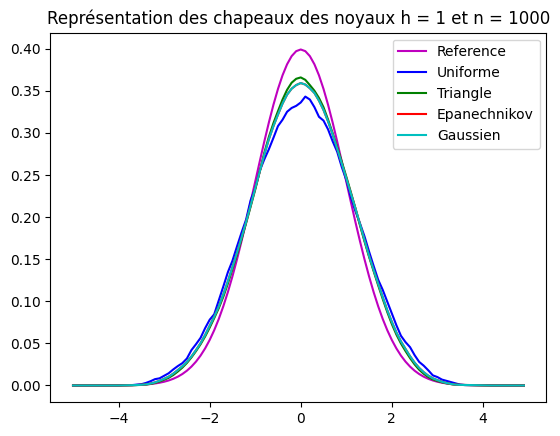

In [83]:
Allplotfchapeauh2(-5, 5, 0.1,1,1000, 'b', 'g', 'r', 'c', 'm',"Représentation des chapeaux des noyaux h = 1 et n = 1000") #On trace pour n=1000 et h=1


#####$\text{Représentation des chapeaux des noyaux h = 2 et n = 1000}$

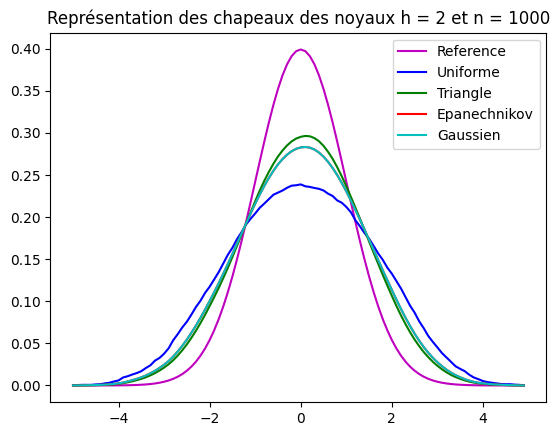

In [84]:
Allplotfchapeauh2(-5, 5, 0.1,2,1000 ,'b', 'g', 'r', 'c', 'm',"Représentation des chapeaux des noyaux h = 2 et n = 1000") #On trace pour n=1000 et h=2


####$\text{Commentaire}$ 
$\small \text{ On remarque que plus h est petit et plus n est grand, plus on a une meilleure résolution}$


---
Nous allons calculer l’erreur quadratique d’une estimation : soit

\begin{align}
\ SCE(h) = \sum_{i=0}^{500}(\widehat{f_{h}}(t_{i}) - f(t_{i})
)^{2}
\end{align}

la somme de carrés des écarts entre l’image de ti par l’estimation fbh et l’image de ti par f, où
{t0, t1, t2, . . . , t500} est une discrétisation de l’intervalle [−5, 5] de pas 10/500.
Autrement dit

\begin{align}
\text{-} 5= t_{0}<t_{1} = \text{-}5 + 10/500 < t_{2} = \text{-}5  + 20/500<...< t_{500} = \text{-}5 + 5000/500 = 5
\end{align}

###$\text{Question 8}$
Définir une fonction SCE qui prend comme paramètre une fonction (le noyau considéré), la fenêtre
h, la densité de référence f et qui retourne SCE(h).

In [85]:
def SCE(function,h,f):
    t_vect = np.linspace(-5, 5, 500)
    erreur = [(fchapeau(function, h, X, t) - f(t))**2 for t in t_vect]
    return np.sum(erreur)

#####$\text{Test sur la fonction K1}$

In [106]:
SCE(K1, 0.75, reference)

0.43421084238880076

###$\text{Question 9}$
Définir une fonction lemeilleurh qui prend une fonction (le noyau en question) et une autre fonction f (la référence) en paramètres et retourne l’index divisé par 100 du minimum de la liste $\left \{SCE(k/100)  \right \}_{1\leq k\leq 200}$. 
Pour chaque noyau, la meilleur fenêtre pour l’etimation de la fonction de référence est donnée par cette fonction.

In [86]:
def lemeilleurh(funct,f) :
    h_vect = np.arange(1, 201) / 100
    sce_vect = [SCE(funct, h, f) for h in h_vect]
    return np.argmin(sce_vect) / 100

#####$\text{Test sur la fonction K1}$

In [107]:
lemeilleurh(K1, reference)

0.81

###$\text{Question 10}$

Définir alors une fonction qui représente graphiquement les quatres estimations de densité pour
ces quatre noyaux avec les fenêtre obtenue via la fonction lemeilleurh. Définir pour ce faire,*italicized text* la
fonction Allplotfchapeauhoptimal

In [114]:
def Allplotfchapeauhoptimal(xmin, xmax, pas, col1, col2, col3, col4,colref, titre):
    x = np.arange(xmin, xmax, pas)
    meilleurh = [lemeilleurh(K1, reference), lemeilleurh(K2, reference), lemeilleurh(K3, reference),lemeilleurh(K4, reference)]
    plt.figure()
    plt.plot(x, [reference(i) for i in x], color=colref, label='Réference')
    plt.plot(x, [fchapeau(K1, meilleurh[0], X, i) for i in x], color=col1, label='Uniforme')
    plt.plot(x, [fchapeau(K2, meilleurh[1], X, i) for i in x], color=col2, label='Triangle')
    plt.plot(x, [fchapeau(K3, meilleurh[2], X, i) for i in x], color=col3, label='Epanechnikov')
    plt.plot(x, [fchapeau(K4, meilleurh[3], X, i) for i in x], color=col4, label='Gaussien')
    plt.legend(['Réference','Uniforme','Triangle','Epanechnikov','Gaussien'])
    plt.title(titre)
    plt.show()

#####$\text{Représentation des chapeaux optimaux}$

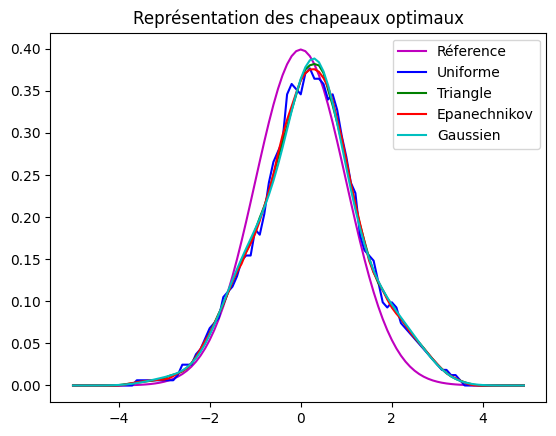

In [117]:
Allplotfchapeauhoptimal(-5,5,0.1,'b','g','r','c','m','Représentation des chapeaux optimaux')

# $Partie \hspace{1mm}2$
Nous allons maintenant exploiter les fonctionnalités de scikit-learn. La fonction estimationdensite
présente dans le script sert à effectuer une estimation de densité par noyau gaussien (kernel=0
gaussian0
)
avec pour fenêtre h dont la densité de référence est un mélange gaussien (de deux gausiennes de moyennes
mu1, mu2 et d’écartyypes sigma1, sigma2). Cette fonction fait appel au package scikit-learn.

###Question 1 
Executer cette fonction avec $mu_{1} = 0, mu_{2} = 5 $ et $sigma_{1} = sigma_{2} = 1, N = 100 $ et $ h = 0.75$.

In [120]:
def estimationdensite(N,h,mu1,sigma1,mu2,sigma2, titre):
        # générer l'échantillon à partir de deux lois normales
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # préparer les points oÃ¹ on calculera la densité
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # préparation de l'affichage de la vraie densité, qui est celle à partir
        #  de laquelle les donnes ont été générés (voir plus haut)
        # la pondération des lois dans la somme est la pondération des lois
        #  dans l'échantillon généré (voir plus haut)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # estimation de densité par noyaux gaussiens
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)   


        # calcul de la densité pour les données de X_plot
        density = np.exp(kde.score_samples(X_plot))

        # affichage : vraie densité et estimation
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.title(titre)
        plt.show()           


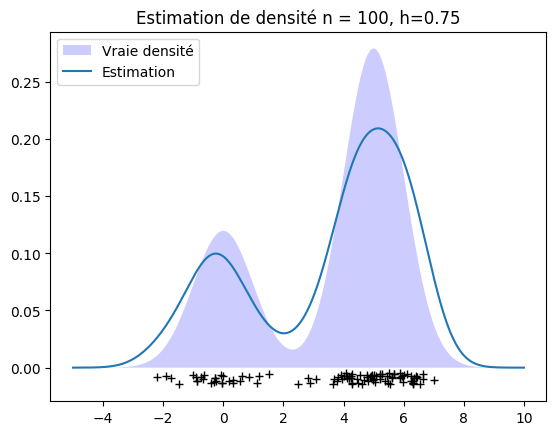

In [121]:
#### Test du code
estimationdensite(N=100, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1, titre='Estimation de densité n = 100, h=0.75')

### Question 2
Comparer à tout autre paramètre fixés comme dans la question précédente, l’influence de la fenêtre
h. On pourra tester des valeurs de h comprises entre $0.2$ et $1.5$. Commenter.

#####$\text{Estimation de la densite pour h = 0.2}$


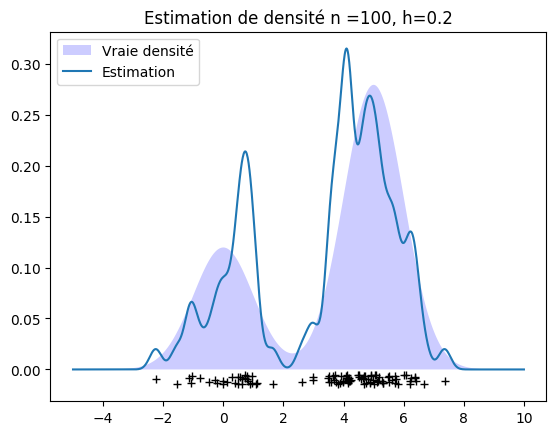

In [122]:
estimationdensite(N=100, h=0.2, mu1=0, sigma1=1, mu2=5, sigma2=1, titre='Estimation de densité n =100, h=0.2')

#####$\text{Estimation de la densite pour h = 0.5}$


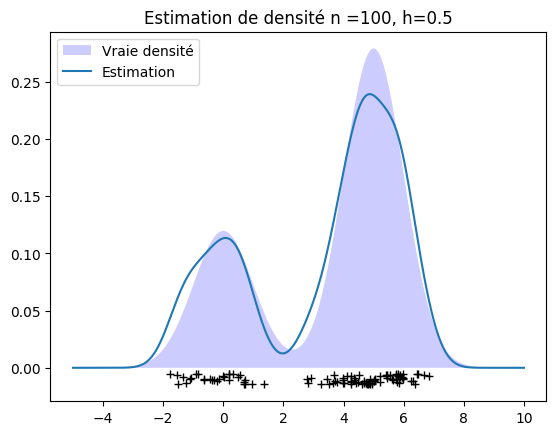

In [123]:
estimationdensite(N=100, h=0.5, mu1=0, sigma1=1, mu2=5, sigma2=1,titre='Estimation de densité n =100, h=0.5')

#####$\text{Estimation de la densite pour h = 1}$


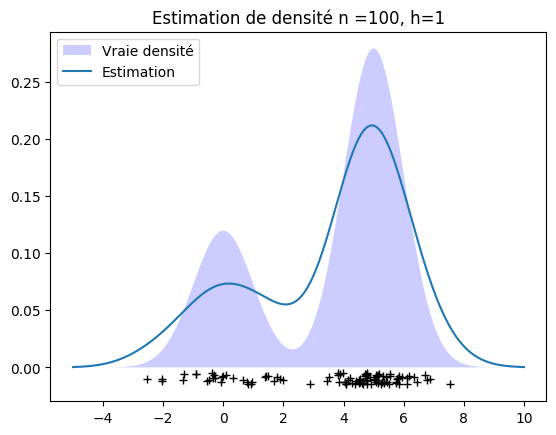

In [124]:
estimationdensite(N=100, h=1, mu1=0, sigma1=1, mu2=5, sigma2=1, titre='Estimation de densité n =100, h=1')

#####$\text{Estimation de la densite pour h = 1.5}$


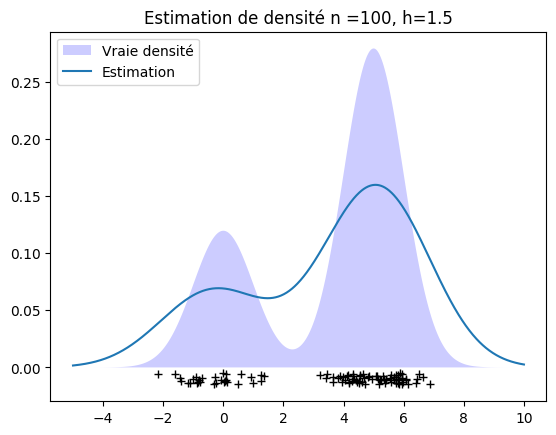

In [125]:
estimationdensite(N=100, h=1.5, mu1=0, sigma1=1, mu2=5, sigma2=1, titre='Estimation de densité n =100, h=1.5')

####$\text{Commentaire}$ 
$\small \text{  On voit bien que lorsqu'on augmente la fênetre h, l'estimation perd de sa précision et diverge vers certaines valeurs que la densité n'atteint pas. Pour h petite, la précision est conservée mais l'allure n'est pas identique.   }$

###Question 3
Faite varier les paramètres des deux lois gaussiennes qui définissent le mélange gaussien. Commenter.

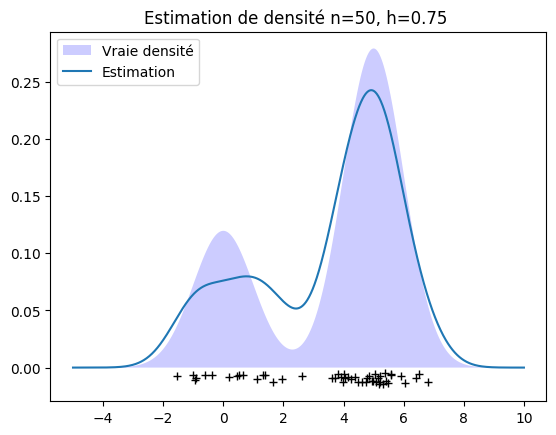

In [127]:
estimationdensite(N=50, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1, titre='Estimation de densité n=50, h=0.75 ')

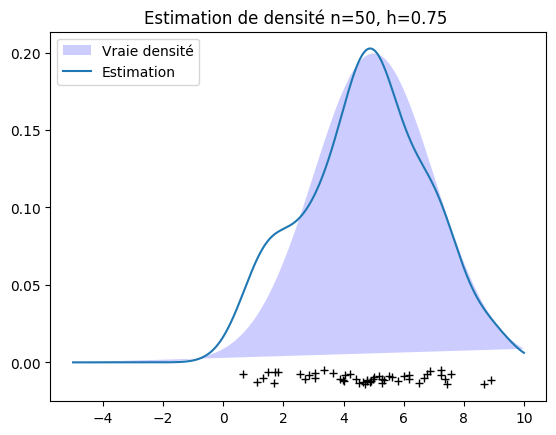

In [128]:
estimationdensite(N=50, h=0.75, mu1=5, sigma1=2, mu2=5, sigma2=2, titre='Estimation de densité n=50, h=0.75 ')

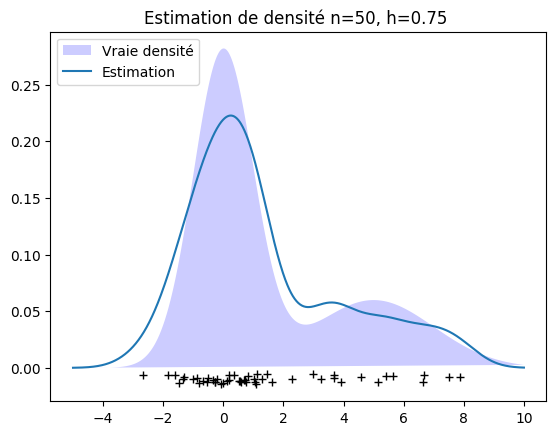

In [129]:
estimationdensite(N=50, h=0.75, mu1=5, sigma1=2, mu2=0, sigma2=1, titre='Estimation de densité n=50, h=0.75 ')

####$\text{Commentaire}$ 
$\small \text{   En inversant les paramètres, on voit que les pics s'inversent aussi. Lorsque les paramètres sont égaux, on remarque qu'il n'y'a qu'un seul pic, et cela pour la vraie densité et l'estimation.  }$

###Question 4
Faite varier N et commenter

*INSERT ANSWER HERE*

#####$\text{Estimation de la densite pour h = 0.75 et N = 10}$


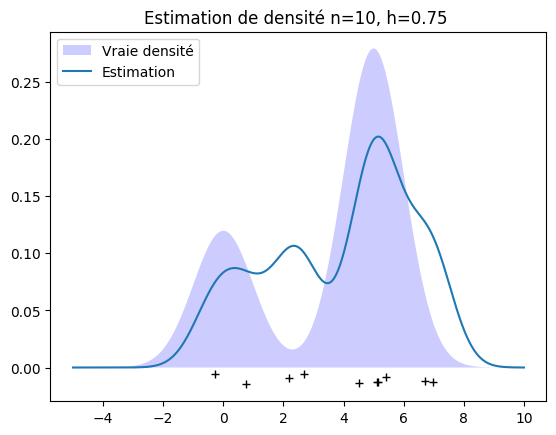

In [131]:
estimationdensite(N=10, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1, titre='Estimation de densité n=10, h=0.75 ')

#####$\text{Estimation de la densite pour h = 0.75 et N = 1000}$


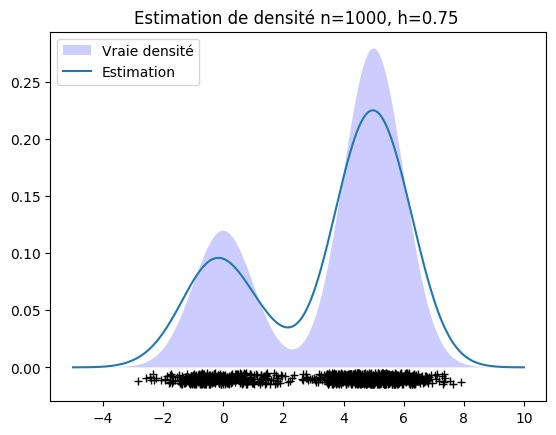

In [140]:
estimationdensite(N=1000, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1,titre='Estimation de densité n=1000, h=0.75 ')

####$\text{Commentaire}$ 
$\small \text{ On voit bien que lorsqu'on augmente N, l'estimation se rapproche de la vraie densité.    }$

### Question 5
On peut aussi tester d’autres noyaux par exemple en remplaçant ’$gaussian$’ dans le code par
’$epanechnikov$’. Réaliser ce graphique en executant la fonction **estimationdensite2** avec les mêmes
paramètres que ceux de la question 1.

In [137]:
def estimationdensite2(N,h,mu1,sigma1,mu2,sigma2, titre):
        # générer l'échantillon à partir de deux lois normales
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # préparer les points oÃ¹ on calculera la densité
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # préparation de l'affichage de la vraie densité, qui est celle à partir
        #  de laquelle les données ont été générées (voir plus haut)
        # la pondération des lois dans la somme est la pondération des lois
        #  dans l'échantillon généré (voir plus haut)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # estimation de densité par noyaux d'epanechnikov
        kde = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(X)   


        # calcul de la densité pour les données de X_plot
        density = np.exp(kde.score_samples(X_plot))

        # affichage : vraie densité et estimation
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.title(titre)
        plt.show()      



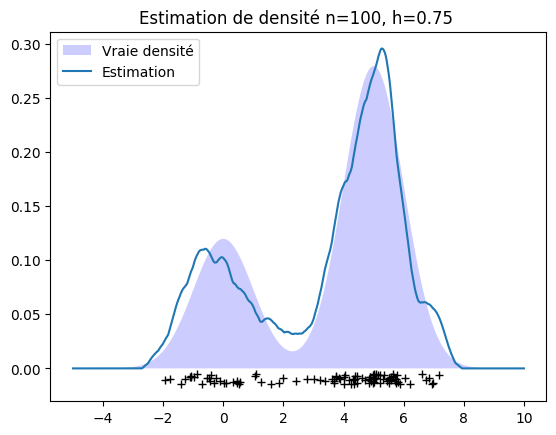

In [138]:
estimationdensite2(N=100, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1,  titre='Estimation de densité n=100, h=0.75 ')

####$\text{Commentaire}$ 
$\small \text{     }$